In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
tf.keras.__version__

'2.8.0'

In [ ]:
tf.config.list_physical_devices("GPU")

[]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
checklist = ["GPU","CPU"]

for device in checklist:
  out_ = tf.config.list_physical_devices(device)
  if len(out_) >0:
    print(device, " is available")
    print("Details: ", out_)
  else:
    print(device, " is not available")

GPU  is not available
CPU  is available
Details:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

(-0.5, 27.5, 27.5, -0.5)

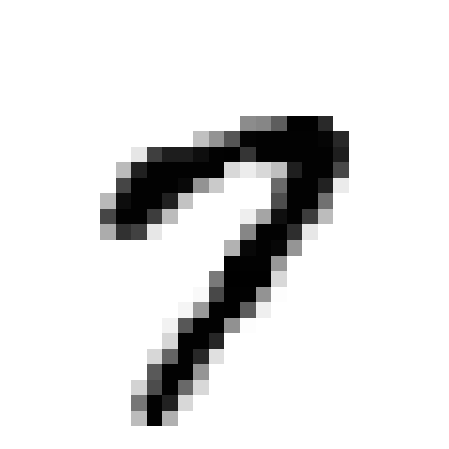

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(X_train_full[15], cmap = "binary")
plt.axis("off")

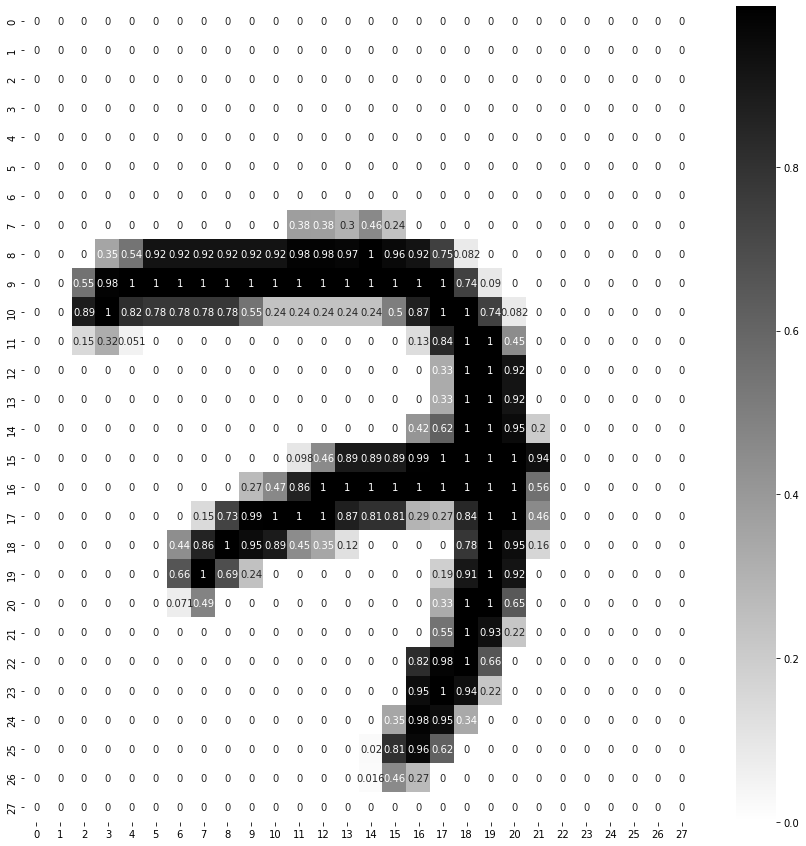

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot = True, cmap = "binary")

In [ ]:
LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer"),
         tf.keras.layers.Dense(300,activation="relu", name = "hiddenlayer1"),
         tf.keras.layers.Dense(100,activation="relu", name = "hiddenlayer2"),
         tf.keras.layers.Dense(10,activation="softmax", name = "outputLayer")]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenlayer1'

In [ ]:
hidden1.get_weights()

[array([[ 0.0588561 , -0.01734512, -0.06042962, ..., -0.05249417,
         -0.00015435, -0.05341061],
        [ 0.0458129 , -0.02776923,  0.00523499, ...,  0.00771772,
         -0.03365054, -0.01160831],
        [-0.00341065,  0.06922942,  0.01060569, ..., -0.01382501,
         -0.06272104,  0.04941716],
        ...,
        [ 0.00451941, -0.05114806,  0.07226931, ...,  0.06984645,
          0.02931783, -0.06270661],
        [-0.00518256, -0.05626529,  0.03930116, ...,  0.02594627,
         -0.04079526, -0.05217921],
        [-0.07166056, -0.01402339, -0.04399162, ..., -0.0536036 ,
          0.04750495,  0.02297919]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("Weights shape: ", weights.shape)
print("Biases shape: ", biases.shape)

Weights shape:  (784, 300)
Biases shape:  (300,)


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentrophy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss= LOSS_FUNCTION, optimizer= OPTIMIZER, metrics= METRICS)

### TENSORBOARD CALLBACK

In [ ]:
import time

def get_log_path(log_dir="logs/fit"):
  filename = time.strftime("log_%Y_%m_%d_%H_%M_%S_")
  log_path = os.path.join(log_dir, filename)
  return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

## Eary Stopping Callbacks

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

## Model Checkpointing Callback

In [ ]:
CKPT_path = "model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only = True)

### **Alternatively**

In [ ]:
model_clf.compile(loss = tf.losses.sparse_categorical_crossentropy,
                  optimizer = tf.keras.optimizers.SGD(0.02),
                  metrics = ["accuracy"])

In [ ]:
EPOCHS = 50
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs= EPOCHS, validation_data= VALIDATION_SET, verbose=2, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                                                                                checkpointing_cb])

Epoch 1/50
1719/1719 - 6s - loss: 0.4609 - accuracy: 0.8776 - val_loss: 0.2578 - val_accuracy: 0.9286 - 6s/epoch - 3ms/step
Epoch 2/50
1719/1719 - 9s - loss: 0.2242 - accuracy: 0.9354 - val_loss: 0.1834 - val_accuracy: 0.9474 - 9s/epoch - 5ms/step
Epoch 3/50
1719/1719 - 8s - loss: 0.1725 - accuracy: 0.9499 - val_loss: 0.1499 - val_accuracy: 0.9582 - 8s/epoch - 5ms/step
Epoch 4/50
1719/1719 - 6s - loss: 0.1400 - accuracy: 0.9597 - val_loss: 0.1271 - val_accuracy: 0.9642 - 6s/epoch - 3ms/step
Epoch 5/50
1719/1719 - 5s - loss: 0.1169 - accuracy: 0.9663 - val_loss: 0.1149 - val_accuracy: 0.9662 - 5s/epoch - 3ms/step
Epoch 6/50
1719/1719 - 5s - loss: 0.0998 - accuracy: 0.9717 - val_loss: 0.1001 - val_accuracy: 0.9712 - 5s/epoch - 3ms/step
Epoch 7/50
1719/1719 - 5s - loss: 0.0860 - accuracy: 0.9762 - val_loss: 0.1015 - val_accuracy: 0.9696 - 5s/epoch - 3ms/step
Epoch 8/50
1719/1719 - 5s - loss: 0.0754 - accuracy: 0.9793 - val_loss: 0.0871 - val_accuracy: 0.9772 - 5s/epoch - 3ms/step
Epoch 9/

In [ ]:
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = model_clf.fit(X_train, y_train, epochs= EPOCHS, validation_data= VALIDATION_SET, verbose=2, batch_size=32, callbacks=[tb_cb, early_stopping_cb,
                                                                                                                                checkpointing_cb])

Epoch 1/50
1719/1719 - 6s - loss: 0.0212 - accuracy: 0.9957 - val_loss: 0.0665 - val_accuracy: 0.9802 - 6s/epoch - 3ms/step
Epoch 2/50
1719/1719 - 7s - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.0693 - val_accuracy: 0.9800 - 7s/epoch - 4ms/step
Epoch 3/50
1719/1719 - 6s - loss: 0.0174 - accuracy: 0.9967 - val_loss: 0.0646 - val_accuracy: 0.9804 - 6s/epoch - 3ms/step
Epoch 4/50
1719/1719 - 6s - loss: 0.0157 - accuracy: 0.9974 - val_loss: 0.0647 - val_accuracy: 0.9796 - 6s/epoch - 4ms/step
Epoch 5/50
1719/1719 - 6s - loss: 0.0143 - accuracy: 0.9978 - val_loss: 0.0635 - val_accuracy: 0.9820 - 6s/epoch - 4ms/step
Epoch 6/50
1719/1719 - 6s - loss: 0.0128 - accuracy: 0.9981 - val_loss: 0.0660 - val_accuracy: 0.9818 - 6s/epoch - 4ms/step
Epoch 7/50
1719/1719 - 8s - loss: 0.0116 - accuracy: 0.9985 - val_loss: 0.0632 - val_accuracy: 0.9820 - 8s/epoch - 5ms/step
Epoch 8/50
1719/1719 - 6s - loss: 0.0104 - accuracy: 0.9986 - val_loss: 0.0642 - val_accuracy: 0.9812 - 6s/epoch - 4ms/step
Epoch 9/

In [ ]:
import time
import os

In [ ]:
def saveModel_path(model_dir="TRAINED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, filename)
  return model_path

In [ ]:
uniquePath = saveModel_path()
uniquePath

'TRAINED_MODEL/Model_2022_06_28_08_22_39_.h5'

In [ ]:
tf.keras.models.save_model(model_clf, uniquePath)

In [ ]:
history.params

{'epochs': 50, 'steps': 1719, 'verbose': 2}

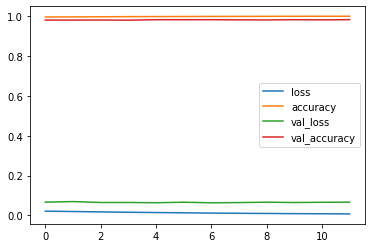

In [ ]:
 pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 14.5609 - accuracy: 0.9755


[14.560911178588867, 0.9754999876022339]

In [ ]:
y_prob = model_clf.predict(X_test[:3])
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(y_prob, axis=-1)

array([7, 2, 1])

In [ ]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [ ]:
loaded_model = tf.keras.models.load_model("/content/TRAINED_MODEL/Model_2022_06_28_06_03_22_.h5")

OSError: ignored

In [ ]:
loaded_model.predict(X_test[:3])

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
%pwd

In [ ]:
%ls